In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [2]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [3]:
ts = pd.read_csv('original_series.csv')
ts

,0
0,956.438486
1,7284.907174
2,11357.870166
3,13622.652007
4,17137.455304
...,...
67,42204.338905
68,42368.641039
69,42564.988401
70,42606.297399


In [4]:
ts.index = np.arange(1,len(ts)+1)
ts

,0
1,956.438486
2,7284.907174
3,11357.870166
4,13622.652007
5,17137.455304
...,...
68,42204.338905
69,42368.641039
70,42564.988401
71,42606.297399


Text(0, 0.5, 'Views')

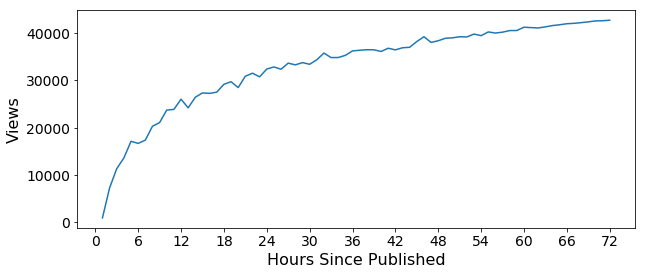

In [5]:
plt.figure(figsize=(10,4))
plt.plot(ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,50000,10000), fontsize=14)
plt.ylabel('Views', fontsize=16)

In [6]:
mu = np.mean(ts)
sigma = np.std(ts).iloc[0]
norm_ts = (ts - mu.iloc[0]) / sigma
mu

0    33110.675802
dtype: float64

In [7]:
mu.iloc[0]

33110.675802312355

In [8]:
norm_ts

,0
1,-3.559113
2,-2.858623
3,-2.407791
4,-2.157105
5,-1.768056
...,...
68,1.006566
69,1.024753
70,1.046486
71,1.051059


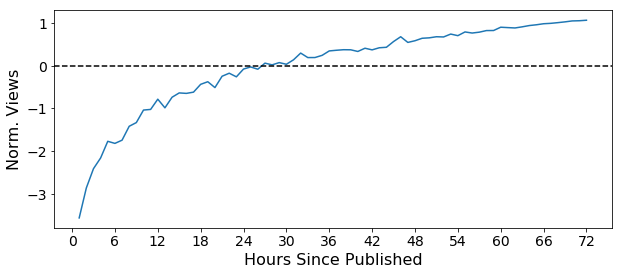

In [9]:
plt.figure(figsize=(10,4))
plt.plot(norm_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-3,2), fontsize=14)
plt.ylabel('Norm. Views', fontsize=16)

plt.axhline(0, color='k', linestyle='--')

In [10]:
exp_ts = np.exp(norm_ts)

Text(0, 0.5, 'Exp. Norm. Views')

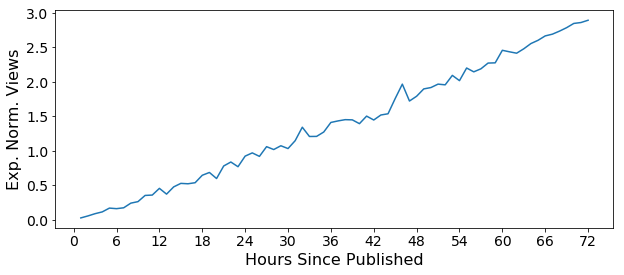

In [11]:
plt.figure(figsize=(10,4))
plt.plot(exp_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,3.5,.5), fontsize=14)
plt.ylabel('Exp. Norm. Views', fontsize=16)

In [12]:
diff_ts = exp_ts.diff().dropna()

Text(0, 0.5, 'First Diff. \nExp. Norm. Views')

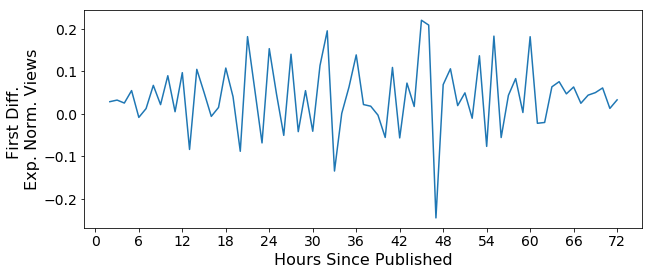

In [13]:
plt.figure(figsize=(10,4))
plt.plot(diff_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-0.2,0.3,.1), fontsize=14)
plt.ylabel('First Diff. \nExp. Norm. Views', fontsize=16)

In [14]:
perform_adf_test(diff_ts)

ADF Statistic: -4.881064
p-value: 0.000038


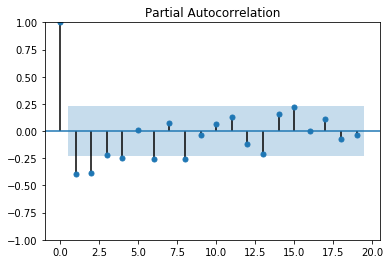

In [15]:
plot_pacf(diff_ts,method='ywm')
plt.show()

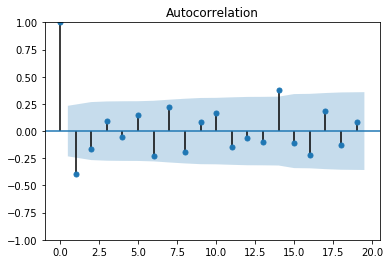

In [16]:
plot_acf(diff_ts)
plt.show()

In [17]:
diff_ts[:-5]

,0
2,0.028884
3,0.032666
4,0.025646
5,0.055005
6,-0.008073
...,...
63,0.063837
64,0.075955
65,0.047294
66,0.063482


In [18]:
#create the model
model = ARIMA(diff_ts[:-5], order=(0,0,1))

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
model_fit = model.fit()

In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   66
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  84.437
Date:                Fri, 02 Dec 2022   AIC                           -162.875
Time:                        23:24:49   BIC                           -156.306
Sample:                             0   HQIC                          -160.279
                                 - 66                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0406      0.002     21.829      0.000       0.037       0.044
ma.L1         -0.8253      0.082    -10.101      0.000      -0.985      -0.665
sigma2         0.0045      0.001      7.187      0.0

In [21]:
prediction_info = model_fit.forecast(7)
prediction_info

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


66    0.015532
67    0.040563
68    0.040563
69    0.040563
70    0.040563
71    0.040563
72    0.040563
Name: predicted_mean, dtype: float64

In [22]:
prediction_info.iloc[0]

0.015532486145750247

Text(0, 0.5, 'First Diff. \nExp. Norm. Views')

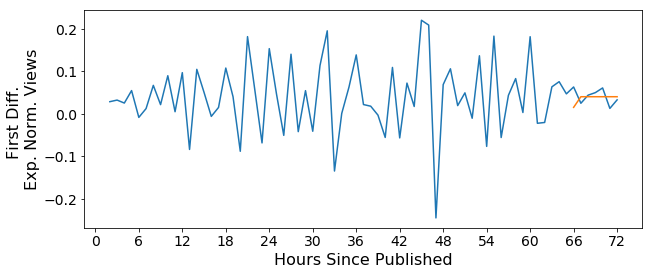

In [23]:
plt.figure(figsize=(10,4))
plt.plot(diff_ts)
plt.plot(prediction_info)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-0.2,0.3,.1), fontsize=14)
plt.ylabel('First Diff. \nExp. Norm. Views', fontsize=16)

In [24]:
#Undo Trnsformation
def undo_transformations(predictions, series, mu, sigma):
    first_pred = sigma*np.log(predictions.iloc[0] + np.exp((series.iloc[-1]-mu)/sigma)) + mu
    orig_predictions = [first_pred]
    
    for i in range(len(predictions[1:])):
        next_pred = sigma*np.log(predictions.iloc[i+1] + np.exp((orig_predictions[-1]-mu)/sigma)) + mu
        orig_predictions.append(next_pred)
    
    return np.array(orig_predictions).flatten()

In [25]:
orig_preds = undo_transformations(prediction_info,ts[:-5], mu, sigma)
orig_preds#Over pred

array([42108.96017831, 42243.30694429, 42375.68512117, 42506.15156843,
       42634.76071714, 42761.56470631, 42886.6135098 ])

Text(0, 0.5, 'Views')

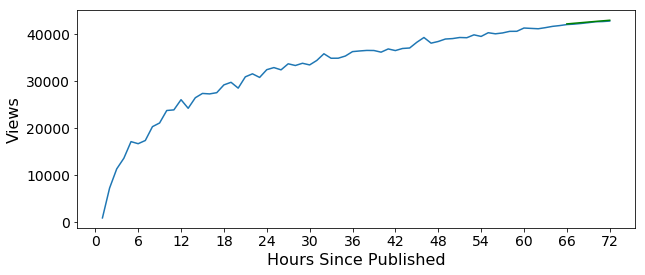

In [26]:
plt.figure(figsize=(10,4))
plt.plot(ts)
#plt.plot(np.arange(len(diff_ts[:-5]), len(diff_ts[:-5])+7), orig_preds, color='g')
plt.plot(np.array(prediction_info.index), orig_preds, color='g')

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,50000,10000), fontsize=14)
plt.ylabel('Views', fontsize=16)

(40000, 45000)

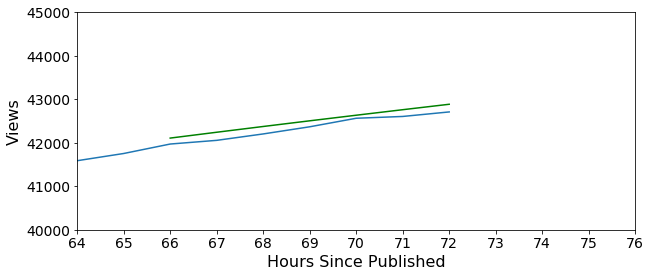

In [27]:
plt.figure(figsize=(10,4))
plt.plot(ts)

plt.xticks(np.arange(0,78), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(40000,46000,1000), fontsize=14)
plt.ylabel('Views', fontsize=16)

plt.plot(np.array(prediction_info.index), orig_preds, color='g')
plt.xlim(64,76)
plt.ylim(40000, 45000)